In [3]:
#Aim of the project is to predict whether the brower will pay back the loan or not

In [1]:
#Importing the basic libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Import information regarding the data
lending_club_info = pd.read_csv('lending_club_info.csv')

In [3]:
lending_club_info

,LoanStatNew,Description
0,loan_amnt,The listed amount of the loan applied for by t...
1,term,The number of payments on the loan. Values are...
2,int_rate,Interest Rate on the loan
3,installment,The monthly payment owed by the borrower if th...
4,grade,LC assigned loan grade
5,sub_grade,LC assigned loan subgrade
6,emp_title,The job title supplied by the Borrower when ap...
7,emp_length,Employment length in years. Possible values ar...
8,home_ownership,The home ownership status provided by the borr...
9,annual_inc,The self-reported annual income provided by th...


In [3]:
#Import Data
lending_club = pd.read_csv('lending_club_loan_two.csv')

In [5]:
lending_club.head().transpose()

,0,1,2,3,4
loan_amnt,10000.0,8000.0,15600.0,7200.0,24375.0
term,36 months,36 months,36 months,36 months,60 months
int_rate,11.44,11.99,10.49,6.49,17.27
installment,329.48,265.68,506.97,220.65,609.33
grade,B,B,B,A,C
sub_grade,B4,B5,B3,A2,C5
emp_title,Marketing,Credit analyst,Statistician,Client Advocate,Destiny Management Inc.
emp_length,10+ years,4 years,< 1 year,6 years,9 years
home_ownership,RENT,MORTGAGE,RENT,RENT,MORTGAGE
annual_inc,117000.0,65000.0,43057.0,54000.0,55000.0


In [6]:
lending_club.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [4]:
# df = df.sample(frac=0.1,random_state=101)
#print(len(df))
lending_club_full_data = lending_club

In [5]:
lending_club = lending_club_full_data.sample(frac=0.1,random_state=101)

In [6]:
lending_club.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,39603.0,14086.946696,8358.771679,1000.00,7900.000,12000.00,20000.00,40000.00
int_rate,39603.0,13.636661,4.458783,5.32,10.490,13.33,16.55,30.99
installment,39603.0,430.818860,250.596588,23.91,249.915,373.88,564.87,1412.79
annual_inc,39603.0,74320.940912,60234.874547,4800.00,45000.000,64000.00,90000.00,6500000.00
dti,39603.0,17.339053,8.071140,0.00,11.350,16.85,22.95,49.38
open_acc,39603.0,11.304699,5.116950,0.00,8.000,10.00,14.00,53.00
pub_rec,39603.0,0.178699,0.494461,0.00,0.000,0.00,0.00,10.00
revol_bal,39603.0,16013.812034,22709.305515,0.00,6118.500,11238.00,19700.50,1743266.00
revol_util,39577.0,54.084941,24.672133,0.00,36.200,55.20,73.00,892.30
total_acc,39603.0,25.457491,11.902525,2.00,17.000,24.00,32.00,150.00


In [190]:
lending_club.head().transpose()

,320323,270206,229969,395169,240800
loan_amnt,5500.0,10000.0,16000.0,7200.0,25000.0
term,36 months,36 months,36 months,36 months,36 months
int_rate,21.99,21.49,8.9,12.29,11.53
installment,210.02,379.28,508.06,240.15,824.76
grade,E,E,A,C,B
sub_grade,E4,E3,A5,C1,B5
emp_title,Payroll Rep,Veterans Administration,State of Utah,orden puller,owner
emp_length,10+ years,5 years,10+ years,3 years,2 years
home_ownership,MORTGAGE,RENT,MORTGAGE,RENT,OWN
annual_inc,38000.0,95000.0,60000.0,38000.0,60000.0


# EDA

<AxesSubplot:xlabel='loan_status', ylabel='count'>

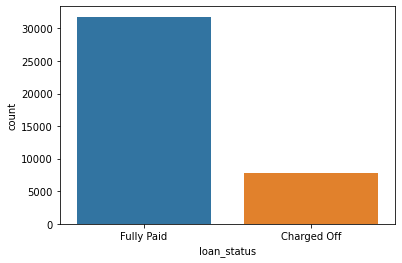

In [10]:
#lending_club['loan_status']
sns.countplot(data=lending_club, x='loan_status')

In [7]:
loan_stat = pd.get_dummies(data=lending_club['loan_status'])

In [8]:
lending_club = pd.concat([lending_club, loan_stat], axis=1)

In [9]:
lending_club = lending_club.drop('Charged Off', axis=1)

<AxesSubplot:>

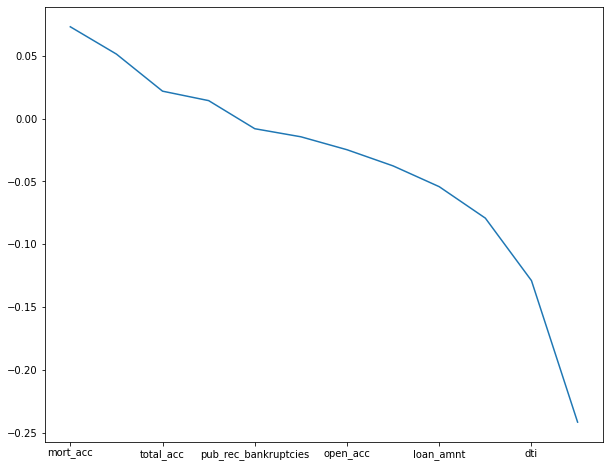

In [10]:
plt.figure(figsize=(10,8))
lending_club.corr().transpose()['Fully Paid'][:-1].sort_values(ascending=False).plot()

In [82]:
lending_club.head().transpose()

,320323,270206,229969,395169,240800
loan_amnt,5500.0,10000.0,16000.0,7200.0,25000.0
term,36 months,36 months,36 months,36 months,36 months
int_rate,21.99,21.49,8.9,12.29,11.53
installment,210.02,379.28,508.06,240.15,824.76
grade,E,E,A,C,B
sub_grade,E4,E3,A5,C1,B5
emp_title,Payroll Rep,Veterans Administration,State of Utah,orden puller,owner
emp_length,10+ years,5 years,10+ years,3 years,2 years
home_ownership,MORTGAGE,RENT,MORTGAGE,RENT,OWN
annual_inc,38000.0,95000.0,60000.0,38000.0,60000.0


In [73]:
lending_club['application_type'].value_counts()

INDIVIDUAL    39554
DIRECT_PAY       26
JOINT            23
Name: application_type, dtype: int64

In [11]:
acc_dummies = pd.get_dummies(data=lending_club['application_type']).drop('JOINT', axis=1)

In [12]:
lending_club = pd.concat([lending_club, acc_dummies], axis=1)

In [13]:
lending_club = lending_club.drop('application_type', axis=1)

In [83]:
lending_club.head().transpose()

,320323,270206,229969,395169,240800
loan_amnt,5500.0,10000.0,16000.0,7200.0,25000.0
term,36 months,36 months,36 months,36 months,36 months
int_rate,21.99,21.49,8.9,12.29,11.53
installment,210.02,379.28,508.06,240.15,824.76
grade,E,E,A,C,B
sub_grade,E4,E3,A5,C1,B5
emp_title,Payroll Rep,Veterans Administration,State of Utah,orden puller,owner
emp_length,10+ years,5 years,10+ years,3 years,2 years
home_ownership,MORTGAGE,RENT,MORTGAGE,RENT,OWN
annual_inc,38000.0,95000.0,60000.0,38000.0,60000.0


In [84]:
lending_club['initial_list_status'].value_counts()

f    23775
w    15828
Name: initial_list_status, dtype: int64

<AxesSubplot:xlabel='initial_list_status', ylabel='Fully Paid'>

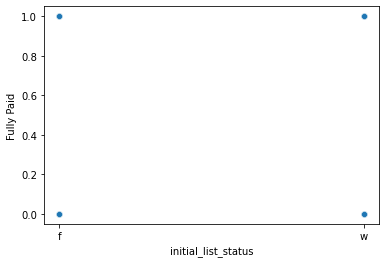

In [18]:
sns.scatterplot(data=lending_club, x='initial_list_status', y='Fully Paid')

<AxesSubplot:xlabel='initial_list_status', ylabel='count'>

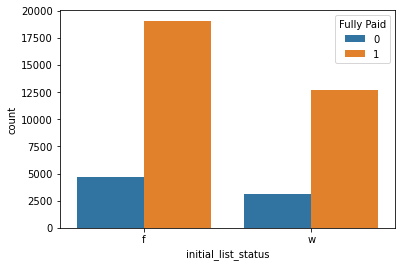

In [92]:
#View the correlation btw initial_list_status and loan_status
sns.countplot(data=lending_club, x='initial_list_status', hue='Fully Paid')

In [14]:
initial_status_dummies = pd.get_dummies(data=lending_club['initial_list_status']).drop('f', axis=1)

In [15]:
lending_club = pd.concat([lending_club, initial_status_dummies], axis=1)
lending_club = lending_club.drop('initial_list_status', axis=1)

In [21]:
len(lending_club['title'].unique())

6571

In [220]:
#As there are 6571 unique values in title coulumn it's better to drop it rather than using in our model
lending_club = lending_club.drop('title', axis=1)

In [112]:
lending_club['purpose'].value_counts()

debt_consolidation    23396
credit_card            8387
home_improvement       2388
other                  2178
major_purchase          824
small_business          557
car                     460
medical                 450
moving                  277
vacation                240
wedding                 193
house                   189
renewable_energy         37
educational              27
Name: purpose, dtype: int64

<AxesSubplot:xlabel='purpose', ylabel='count'>

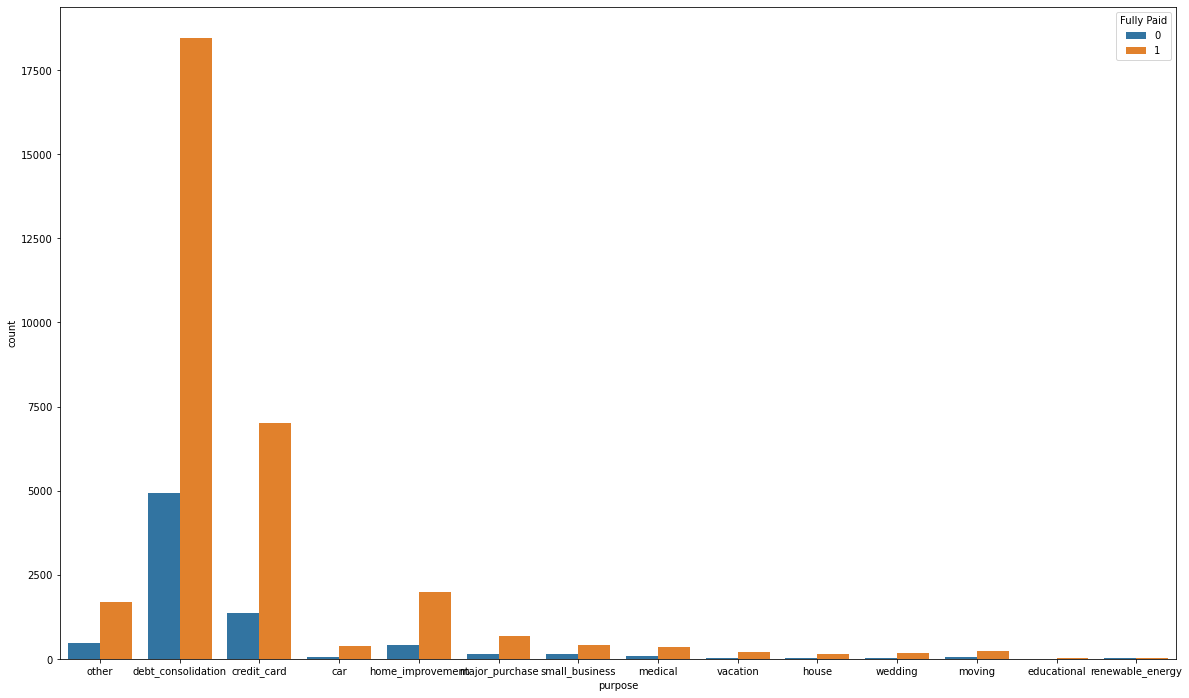

In [115]:
plt.figure(figsize=(20,12))
sns.countplot(data=lending_club, x='purpose', hue='Fully Paid')

In [ ]:
#Purpose column is in pending

In [118]:
lending_club['verification_status'].value_counts()

Verified           13895
Source Verified    13071
Not Verified       12637
Name: verification_status, dtype: int64

<AxesSubplot:xlabel='verification_status', ylabel='count'>

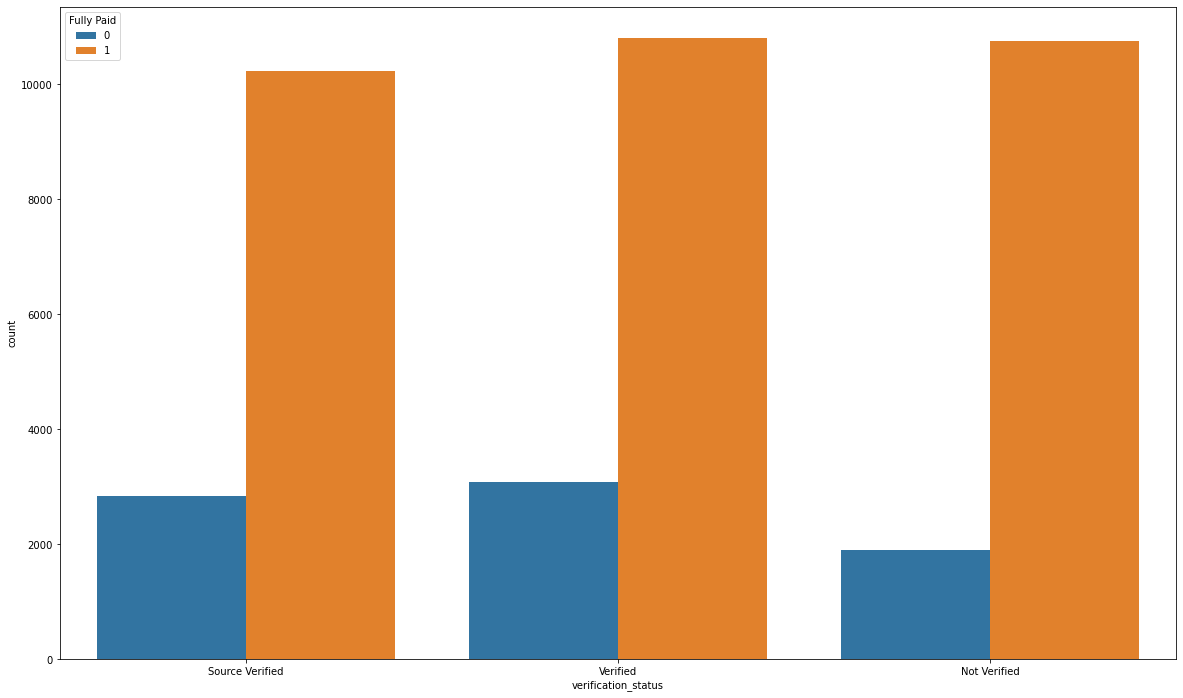

In [221]:
plt.figure(figsize=(20,12))
sns.countplot(data=lending_club, x='verification_status', hue='Fully Paid')

In [16]:
#Feature engineering  
verification_dummies = pd.get_dummies(data=lending_club['verification_status']).drop('Source Verified', axis=1)

In [17]:
lending_club = pd.concat([lending_club, verification_dummies], axis=1)
lending_club = lending_club.drop('verification_status', axis=1)

In [224]:
lending_club['term'].value_counts()

 36 months    30151
 60 months     9452
Name: term, dtype: int64

<AxesSubplot:xlabel='term', ylabel='count'>

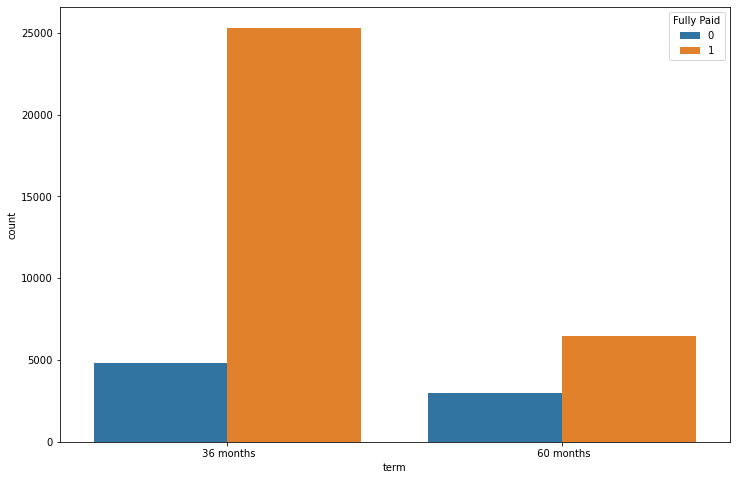

In [130]:
plt.figure(figsize=(12,8))
sns.countplot(data=lending_club, x='term', hue='Fully Paid')

In [18]:
#Apply Feature Engineering for term feature
term_dummies =  pd.get_dummies(data=lending_club['term']).iloc[:,1:]

In [19]:
lending_club = pd.concat([lending_club, term_dummies], axis=1)
lending_club = lending_club.drop('term', axis=1)

In [227]:
len(lending_club['emp_title'].unique())

23815

In [20]:
#emp_title column has a wide variety of values it may not be help for our model training.let's drop the column
lending_club = lending_club.drop('emp_title', axis=1)

In [229]:
lending_club['home_ownership'].value_counts()

MORTGAGE    19813
RENT        15965
OWN          3815
OTHER           7
NONE            3
Name: home_ownership, dtype: int64

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

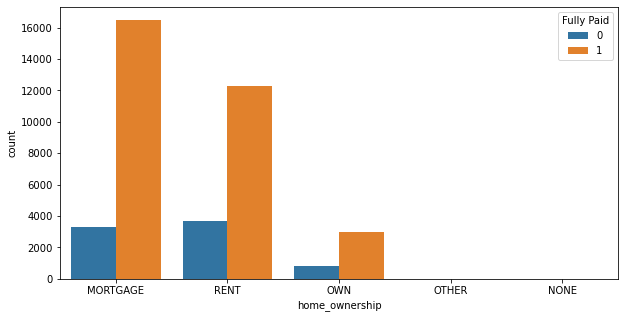

In [230]:
plt.figure(figsize=(10,5))
sns.countplot(data=lending_club, x='home_ownership', hue='Fully Paid')

In [21]:
lending_club = lending_club[lending_club['home_ownership']!='OTHER']

In [22]:
lending_club = lending_club[lending_club['home_ownership']!='NONE']

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

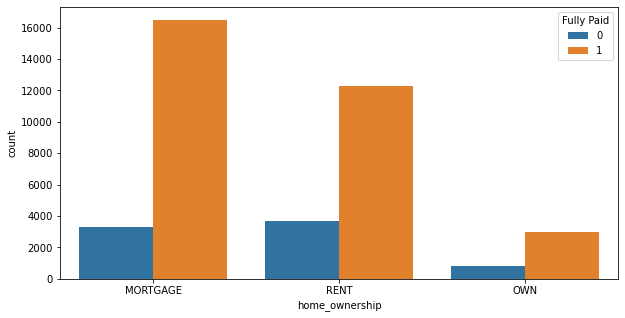

In [29]:
plt.figure(figsize=(10,5))
sns.countplot(data=lending_club, x='home_ownership', hue='Fully Paid')

In [23]:
#Create dumies for home_ownership type
home_ownership_dummies =  pd.get_dummies(data=lending_club['home_ownership']).iloc[:,1:]

In [24]:
lending_club = pd.concat([lending_club, home_ownership_dummies], axis=1)
lending_club = lending_club.drop('home_ownership', axis=1)

In [25]:
lending_club.head().transpose()

,320323,270206,229969,395169,240800
loan_amnt,5500.0,10000.0,16000.0,7200.0,25000.0
int_rate,21.99,21.49,8.9,12.29,11.53
installment,210.02,379.28,508.06,240.15,824.76
grade,E,E,A,C,B
sub_grade,E4,E3,A5,C1,B5
emp_length,10+ years,5 years,10+ years,3 years,2 years
annual_inc,38000.0,95000.0,60000.0,38000.0,60000.0
issue_d,Mar-2014,Jun-2013,Jul-2013,Aug-2015,Sep-2015
loan_status,Fully Paid,Fully Paid,Fully Paid,Charged Off,Charged Off
purpose,other,debt_consolidation,credit_card,car,credit_card


In [33]:
lending_club['issue_d'].unique()[0]

'Mar-2014'

In [29]:
pd.to_datetime('Mar-2014').month

3

In [54]:
#Inorder to avoid data leakage we need to drop the Issue_d column
lending_club.drop('issue_d', axis=1, inplace=True)

In [56]:
lending_club.drop('loan_status', axis=1, inplace=True)

In [66]:
lending_club.drop('title', axis=1, inplace=True)

In [68]:
#lending_club.drop('purpose', axis=1, inplace=True)
#lending_club.head().transpose()
len(lending_club['earliest_cr_line'].unique())

587

In [85]:
pd.to_datetime(lending_club['earliest_cr_line'].unique()).year.sort_values()

Int64Index([1950, 1953, 1955, 1956, 1959, 1959, 1959, 1960, 1961, 1961,
            ...
            2012, 2012, 2012, 2012, 2012, 2012, 2012, 2013, 2013, 2013],
           dtype='int64', length=587)

In [86]:
def getYearFromString(timeStamp):
    return pd.to_datetime(timeStamp).year

In [96]:
geMonthFromString('Mar-2017')

3

In [94]:
lending_club['cr_line_year'] = lending_club['earliest_cr_line'].apply(getYearFromString)

In [95]:
def geMonthFromString(timeStamp):
    return pd.to_datetime(timeStamp).month

In [97]:
lending_club['cr_line_month'] = lending_club['earliest_cr_line'].apply(geMonthFromString)

In [111]:
plt.figure(figsize=(20,12))
sns.countplot(data=lending_club[lending_club['cr_line_year']>1980], x='cr_line_year', hue='Fully Paid')

<AxesSubplot:xlabel='cr_line_month', ylabel='count'>

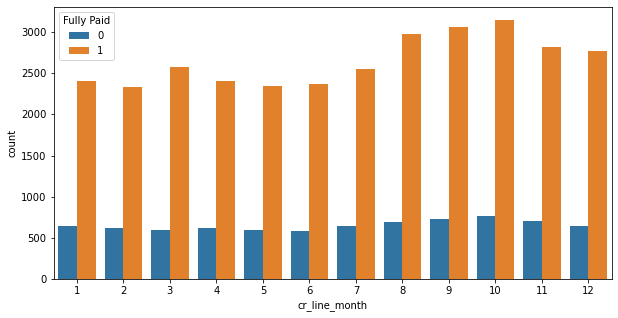

In [110]:
plt.figure(figsize=(10,5))
sns.countplot(data=lending_club, x='cr_line_month', hue='Fully Paid')

In [112]:
lending_club.drop('earliest_cr_line', axis=1, inplace=True)

In [114]:
lending_club.drop('address', axis=1, inplace=True)

In [116]:
len(lending_club['purpose'].unique())

14

In [125]:
#Analysing the emp_length column
plt.figure(figsize=(14,8))
sns.countplot(data=lending_club, x='emp_length', hue='Fully Paid')

In [124]:
lending_club.groupby('emp_length').mean('Fully Paid')['Fully Paid']

emp_length
1 year       0.805887
10+ years    0.818361
2 years      0.816417
3 years      0.799252
4 years      0.808484
5 years      0.799171
6 years      0.816706
7 years      0.791408
8 years      0.790497
9 years      0.788250
< 1 year     0.788878
Name: Fully Paid, dtype: float64

In [126]:
#As the mean of probabilty to pay back the loan is smiliar in all the categories of emp_lenght, this column may not be helpful to distingish the result so it's better to drop the column
lending_club.drop('emp_length', axis=1, inplace=True)

In [127]:
lending_club.head().transpose()

,320323,270206,229969,395169,240800
loan_amnt,5500.0,10000.0,16000.0,7200.0,25000.0
int_rate,21.99,21.49,8.9,12.29,11.53
installment,210.02,379.28,508.06,240.15,824.76
grade,E,E,A,C,B
sub_grade,E4,E3,A5,C1,B5
annual_inc,38000.0,95000.0,60000.0,38000.0,60000.0
purpose,other,debt_consolidation,credit_card,car,credit_card
dti,16.99,17.08,22.0,21.76,12.2
open_acc,10.0,19.0,11.0,9.0,7.0
pub_rec,1.0,0.0,0.0,1.0,0.0


In [132]:
# As grade is a part of subgrade we can drop grade column
lending_club.drop('grade', axis=1, inplace=True)

In [135]:
purpose_sub_garde_dummies =  pd.get_dummies(data=lending_club[['purpose', 'sub_grade']], drop_first=True)

In [136]:
purpose_sub_garde_dummies.head()

,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,...,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5
320323,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
270206,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
229969,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
395169,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
240800,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [137]:
pd.concat([lending_club, purpose_sub_garde_dummies], axis=1)

,loan_amnt,int_rate,installment,sub_grade,annual_inc,purpose,dti,open_acc,pub_rec,revol_bal,...,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5
320323,5500.0,21.99,210.02,E4,38000.0,other,16.99,10.0,1.0,3761.0,...,0,0,0,0,0,0,0,0,0,0
270206,10000.0,21.49,379.28,E3,95000.0,debt_consolidation,17.08,19.0,0.0,17553.0,...,0,0,0,0,0,0,0,0,0,0
229969,16000.0,8.90,508.06,A5,60000.0,credit_card,22.00,11.0,0.0,39866.0,...,0,0,0,0,0,0,0,0,0,0
395169,7200.0,12.29,240.15,C1,38000.0,car,21.76,9.0,1.0,8107.0,...,0,0,0,0,0,0,0,0,0,0
240800,25000.0,11.53,824.76,B5,60000.0,credit_card,12.20,7.0,0.0,13753.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121823,8000.0,15.77,280.35,D1,30000.0,debt_consolidation,34.28,11.0,0.0,7703.0,...,0,0,0,0,0,0,0,0,0,0
332805,20000.0,9.99,645.25,B3,75000.0,credit_card,21.74,14.0,0.0,6191.0,...,0,0,0,0,0,0,0,0,0,0
277194,11000.0,6.97,339.50,A3,43000.0,debt_consolidation,15.29,11.0,0.0,10390.0,...,0,0,0,0,0,0,0,0,0,0
207762,35000.0,11.44,768.69,B4,90000.0,credit_card,13.25,6.0,0.0,49649.0,...,0,0,0,0,0,0,0,0,0,0


In [138]:
lending_club.drop('purpose', axis=1, inplace=True)
lending_club.drop('sub_grade', axis=1, inplace=True)

In [144]:
#lending_club.head().transpose()
lending_club.isnull()

<AxesSubplot:>

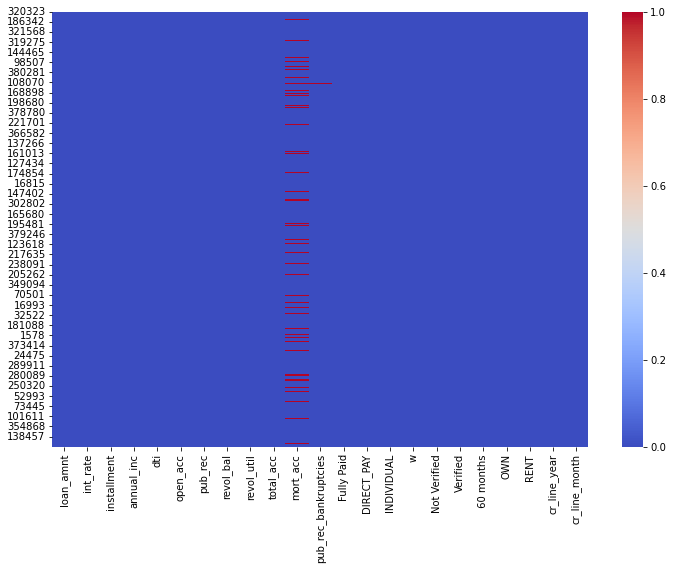

In [143]:
plt.figure(figsize=(12,8))
sns.heatmap(lending_club.isnull(), cmap='coolwarm')

In [158]:
lending_club[lending_club['mort_acc'].isnull()]

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,...,DIRECT_PAY,INDIVIDUAL,w,Not Verified,Verified,60 months,OWN,RENT,cr_line_year,cr_line_month
63413,5250.0,11.49,173.10,39000.0,19.14,13.0,0.0,7716.0,36.4,17.0,...,0,1,0,1,0,0,0,1,1999,8
353688,3600.0,7.90,112.65,38400.0,24.20,14.0,0.0,13592.0,51.5,45.0,...,0,1,0,1,0,0,0,1,1998,7
314228,12175.0,12.68,275.03,106000.0,13.70,7.0,0.0,568.0,81.1,28.0,...,0,1,0,0,1,1,0,0,1992,5
197590,12000.0,11.49,263.86,24724.0,17.47,6.0,0.0,9737.0,60.5,21.0,...,0,1,0,0,0,1,0,1,2003,9
149897,25000.0,18.25,638.25,101000.0,16.27,13.0,0.0,16370.0,77.2,25.0,...,0,1,0,0,0,1,0,0,1998,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73428,16000.0,14.65,551.91,43000.0,13.48,5.0,0.0,8337.0,86.8,19.0,...,0,1,0,0,1,0,0,1,2004,4
149312,10000.0,14.27,343.09,36000.0,10.57,16.0,0.0,6906.0,49.0,25.0,...,0,1,0,0,0,0,0,1,2001,9
66980,2600.0,12.69,87.22,9600.0,1.25,17.0,0.0,410.0,2.3,22.0,...,0,1,0,0,0,0,0,1,2008,4
196441,3600.0,9.25,114.90,53000.0,5.57,8.0,0.0,3356.0,12.3,16.0,...,0,1,0,1,0,0,0,1,2001,9


In [160]:
lending_club['mort_acc'] = lending_club['mort_acc'].apply()

In [166]:
lending_club.groupby('total_acc').mean()['mort_acc']

In [174]:
mort_acc_avg = lending_club.groupby('total_acc').mean()['mort_acc']
#total_acc_avg = df.groupby('total_acc').mean()['mort_acc']

In [180]:
def fill_na_mort_acc(tot_acc, mort_acc):
    
    if  np.isnan(mort_acc):
        return mort_acc_avg[tot_acc]
    else:
        return mort_acc
    

In [181]:
lending_club['mort_acc'] = lending_club.apply(lambda x: fill_na_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

<AxesSubplot:>

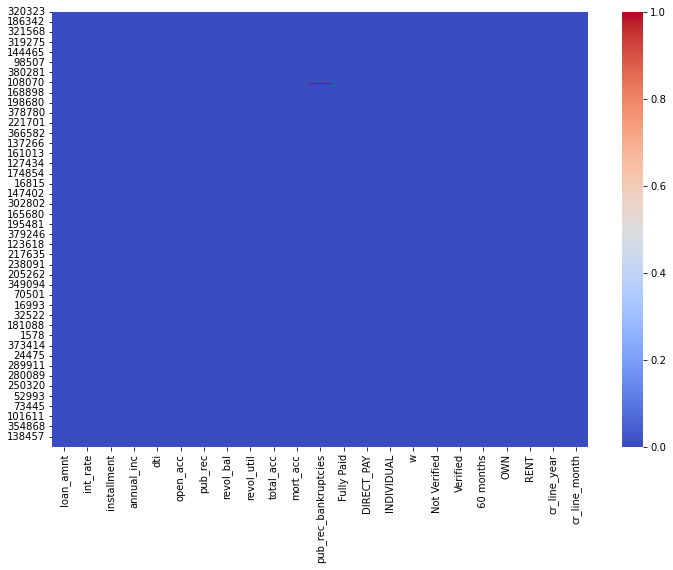

In [185]:
plt.figure(figsize=(12,8))
sns.heatmap(lending_club.isnull(), cmap='coolwarm')

In [200]:
len(lending_club[lending_club['pub_rec_bankruptcies'].isnull()]['pub_rec_bankruptcies'])

57

In [ ]:
#No of Public reported baankruptcies count is less than 0.14% so now we will go ahead and drop those records
39593

In [205]:
lending_club.dropna(inplace=True)

In [206]:
lending_club.head().transpose()

,320323,270206,229969,395169,240800
loan_amnt,5500.00,10000.00,16000.00,7200.00,25000.00
int_rate,21.99,21.49,8.90,12.29,11.53
installment,210.02,379.28,508.06,240.15,824.76
annual_inc,38000.00,95000.00,60000.00,38000.00,60000.00
dti,16.99,17.08,22.00,21.76,12.20
open_acc,10.00,19.00,11.00,9.00,7.00
pub_rec,1.00,0.00,0.00,1.00,0.00
revol_bal,3761.00,17553.00,39866.00,8107.00,13753.00
revol_util,71.00,76.70,67.40,61.00,52.70
total_acc,18.00,37.00,20.00,13.00,9.00


In [211]:
lending_club.corr()['Fully Paid'].sort_values(ascending=True)

int_rate               -0.241473
 60 months             -0.165829
dti                    -0.128898
revol_util             -0.078849
RENT                   -0.069358
loan_amnt              -0.053901
Verified               -0.045433
installment            -0.037213
cr_line_year           -0.034827
open_acc               -0.024740
pub_rec                -0.014452
OWN                    -0.011255
pub_rec_bankruptcies   -0.008091
DIRECT_PAY             -0.007105
w                       0.000801
INDIVIDUAL              0.002392
cr_line_month           0.011021
revol_bal               0.014306
total_acc               0.022069
annual_inc              0.051586
mort_acc                0.068865
Not Verified            0.081753
Fully Paid              1.000000
Name: Fully Paid, dtype: float64

In [213]:
lending_club.head().transpose()

,320323,270206,229969,395169,240800
loan_amnt,5500.00,10000.00,16000.00,7200.00,25000.00
int_rate,21.99,21.49,8.90,12.29,11.53
installment,210.02,379.28,508.06,240.15,824.76
annual_inc,38000.00,95000.00,60000.00,38000.00,60000.00
dti,16.99,17.08,22.00,21.76,12.20
open_acc,10.00,19.00,11.00,9.00,7.00
pub_rec,1.00,0.00,0.00,1.00,0.00
revol_bal,3761.00,17553.00,39866.00,8107.00,13753.00
revol_util,71.00,76.70,67.40,61.00,52.70
total_acc,18.00,37.00,20.00,13.00,9.00


In [218]:
len(lending_club.columns)

23

In [220]:
lending_club.columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'Fully Paid', 'DIRECT_PAY', 'INDIVIDUAL', 'w',
       'Not Verified', 'Verified', ' 60 months', 'OWN', 'RENT', 'cr_line_year',
       'cr_line_month'],
      dtype='object')

In [223]:
purpose_sub_garde_dummies.columns

Index(['purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'sub_grade_A2', 'sub_grade_A3',
       'sub_grade_A4', 'sub_grade_A5', 'sub_grade_B1', 'sub_grade_B2',
       'sub_grade_B3', 'sub_grade_B4', 'sub_grade_B5', 'sub_grade_C1',
       'sub_grade_C2', 'sub_grade_C3', 'sub_grade_C4', 'sub_grade_C5',
       'sub_grade_D1', 'sub_grade_D2', 'sub_grade_D3', 'sub_grade_D4',
       'sub_grade_D5', 'sub_grade_E1', 'sub_grade_E2', 'sub_grade_E3',
       'sub_grade_E4', 'sub_grade_E5', 'sub_grade_F1', 'sub_grade_F2',
       'sub_grade_F3', 'sub_grade_F4', 'sub_grade_F5', 'sub_grade_G1',
       'sub_grade_G2', 'sub_grade_G3', 'sub_grade_G4', 'sub_grade_G5'],
      dtype='object')

In [224]:
lending_club_df = pd.concat([lending_club, purpose_sub_garde_dummies], axis=1)

In [227]:
#Now we are done with data EDA, Data cleaning now we can proceed with training the model

# Model Training

In [310]:
X = lending_club_df.drop('Fully Paid', axis=1).values
y = lending_club_df['Fully Paid'].values

In [311]:
from sklearn.model_selection import train_test_split

In [312]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [234]:
from sklearn.preprocessing import MinMaxScaler

In [313]:
scaler = MinMaxScaler()

In [314]:
X_train = scaler.fit_transform(X_train)

In [315]:
X_test = scaler.transform(X_test)

In [316]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [331]:
model = Sequential()

In [332]:
#Creating the normal model (without early stoping and drop out layers)
model.add(Dense(69, activation='relu'))

model.add(Dense(34, activation='relu'))

model.add(Dense(15, activation='relu'))

model.add(Dense(units=1,activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam')

In [333]:
model.fit(x=X_train, y=y_train, epochs=15, batch_size=256, validation_data=(X_test, y_test))
#, validation_data=(X_test, y_test),

Epoch 1/15
109/109 [==============================] - 2s 11ms/step - loss: 0.4843 - val_loss: 0.4662
Epoch 2/15
109/109 [==============================] - 1s 7ms/step - loss: 0.4605 - val_loss: 0.4615
Epoch 3/15
109/109 [==============================] - 1s 9ms/step - loss: 0.4573 - val_loss: 0.4604
Epoch 4/15
109/109 [==============================] - 1s 9ms/step - loss: 0.4545 - val_loss: 0.4600
Epoch 5/15
109/109 [==============================] - 1s 9ms/step - loss: 0.4538 - val_loss: 0.4614
Epoch 6/15
109/109 [==============================] - 1s 9ms/step - loss: 0.4523 - val_loss: 0.4592
Epoch 7/15
109/109 [==============================] - 1s 9ms/step - loss: 0.4505 - val_loss: 0.4601
Epoch 8/15
109/109 [==============================] - 1s 8ms/step - loss: 0.4499 - val_loss: 0.4596
Epoch 9/15
109/109 [==============================] - 1s 6ms/step - loss: 0.4491 - val_loss: 0.4596
Epoch 10/15
109/109 [==============================] - 1s 6ms/step - loss: 0.4472 - val_loss: 0.460

In [334]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

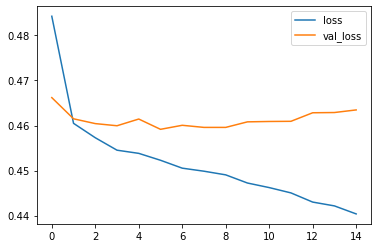

In [335]:
model_loss.plot()

In [337]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

In [341]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [340]:
confusion_matrix(y_test, predictions)

array([[ 160, 2169],
       [ 162, 9362]], dtype=int64)

In [343]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.50      0.07      0.12      2329
         1.0       0.81      0.98      0.89      9524

    accuracy                           0.80     11853
   macro avg       0.65      0.53      0.50     11853
weighted avg       0.75      0.80      0.74     11853



In [345]:
from tensorflow.keras.layers import Dropout, Activation
from tensorflow.keras.callbacks import EarlyStopping

In [346]:
estop = EarlyStopping(monitor='val_loss', patience=5, mode='min', verbose=1)

In [347]:
model_e = Sequential()

model_e.add(Dense(69, activation='relu'))
model_e.add(Dropout(0.5))

model_e.add(Dense(34, activation='relu'))
model_e.add(Dropout(0.5))

model_e.add(Dense(15, activation='relu'))
model_e.add(Dropout(0.5))

model_e.add(Dense(1, activation='sigmoid'))


model_e.compile(optimizer='adam', loss='binary_crossentropy')

In [349]:
model_e.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), callbacks=[estop], epochs=50, batch_size=256)

Epoch 1/50
109/109 [==============================] - 2s 14ms/step - loss: 0.4650 - val_loss: 0.4605
Epoch 2/50
109/109 [==============================] - 2s 18ms/step - loss: 0.4651 - val_loss: 0.4604
Epoch 3/50
109/109 [==============================] - 2s 19ms/step - loss: 0.4636 - val_loss: 0.4604
Epoch 4/50
109/109 [==============================] - 2s 20ms/step - loss: 0.4632 - val_loss: 0.4603
Epoch 5/50
109/109 [==============================] - 2s 19ms/step - loss: 0.4639 - val_loss: 0.4606
Epoch 6/50
109/109 [==============================] - 2s 20ms/step - loss: 0.4638 - val_loss: 0.4599
Epoch 7/50
109/109 [==============================] - 2s 19ms/step - loss: 0.4637 - val_loss: 0.4597
Epoch 8/50
109/109 [==============================] - 2s 19ms/step - loss: 0.4619 - val_loss: 0.4600
Epoch 9/50
109/109 [==============================] - 2s 17ms/step - loss: 0.4623 - val_loss: 0.4598
Epoch 10/50
109/109 [==============================] - 2s 14ms/step - loss: 0.4619 - val_lo

In [350]:
model_2_loss = pd.DataFrame(model_e.history.history)

<AxesSubplot:>

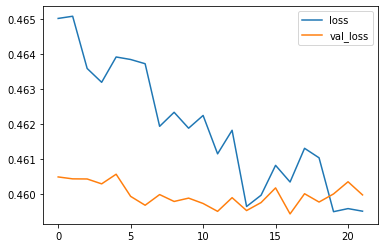

In [351]:
model_2_loss.plot()

In [352]:
predictions_e = (model_e.predict(X_test) > 0.5).astype("int32")

In [353]:
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.50      0.07      0.12      2329
         1.0       0.81      0.98      0.89      9524

    accuracy                           0.80     11853
   macro avg       0.65      0.53      0.50     11853
weighted avg       0.75      0.80      0.74     11853

[[ 160 2169]
 [ 162 9362]]


In [354]:
#Weighted avg accuracy is 75% which is considered as not bad
#Now we will try to predict whether a person will default or pay back the loans

In [377]:
lending_club_df.iloc[202]['Fully Paid']

1.0

In [374]:
pd.DataFrame(lending_club_df.iloc[2222]).transpose().drop('Fully Paid', axis=1)

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,...,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5
23400,15000.0,12.99,505.34,80000.0,7.56,12.0,0.0,10021.0,72.6,32.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [381]:
(model_e.predict(pd.DataFrame(lending_club_df.iloc[2222]).transpose().drop('Fully Paid', axis=1)) > 0.5).astype("int32")

array([[1]])

In [379]:
lending_club_df['Fully Paid'].value_counts()

1.0    31708
0.0     7802
Name: Fully Paid, dtype: int64

# Tensorboard

In [382]:
from tensorflow.keras.callbacks import TensorBoard

In [383]:
from datetime import datetime

In [388]:
uniqueDateTime = datetime.now().strftime("%Y-%m-%d--%H%M")
print(uniqueDateTime)

2022-03-14--2258


In [389]:
log_directory = 'logs\\fit\\'+ uniqueDateTime

board = TensorBoard(log_dir=log_directory, histogram_freq=1,
                    write_graph=True,
                    write_images=True,
                    update_freq='epochs',
                    profile_batch=2,
                    embeddings_freq=1)

In [390]:
#Create the model and train using board

In [391]:
model_tb = Sequential()

model_tb.add(Dense(69, activation='relu'))
model_tb.add(Dropout(0.5))

model_tb.add(Dense(34, activation='relu'))
model_tb.add(Dropout(0.5))

model_tb.add(Dense(15, activation='relu'))
model_tb.add(Dropout(0.5))

model_tb.add(Dense(1, activation='sigmoid'))


model_tb.compile(optimizer='adam', loss='binary_crossentropy')

In [393]:
#Train the model
model_tb.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=50, batch_size=256,
            callbacks=[estop, board])

Epoch 1/50
109/109 [==============================] - 4s 19ms/step - loss: 0.5460 - val_loss: 0.4889
Epoch 2/50
109/109 [==============================] - 1s 12ms/step - loss: 0.5034 - val_loss: 0.4740
Epoch 3/50
109/109 [==============================] - 1s 11ms/step - loss: 0.4928 - val_loss: 0.4663
Epoch 4/50
109/109 [==============================] - 1s 12ms/step - loss: 0.4858 - val_loss: 0.4626
Epoch 5/50
109/109 [==============================] - 2s 16ms/step - loss: 0.4818 - val_loss: 0.4636
Epoch 6/50
109/109 [==============================] - 2s 16ms/step - loss: 0.4798 - val_loss: 0.4620
Epoch 7/50
109/109 [==============================] - 1s 14ms/step - loss: 0.4776 - val_loss: 0.4618
Epoch 8/50
109/109 [==============================] - 2s 15ms/step - loss: 0.4759 - val_loss: 0.4606
Epoch 9/50
109/109 [==============================] - 1s 14ms/step - loss: 0.4776 - val_loss: 0.4620
Epoch 10/50
109/109 [==============================] - 1s 13ms/step - loss: 0.4745 - val_lo

In [394]:
#Open command prompt and naviate to the folder where the notebook is create

In [396]:
#Command for tensorboard to activate
tensorboard --logdir logs\fit 